<a href="https://colab.research.google.com/github/HaNaK0/Spamfilter/blob/main/spamfilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Title: DM1590 Final Project: SPAM FILTERINATOR
Authors: **Martin Håkansson, Emil Hansen, Hampus Huledal, Filip Hedman**

##Background and motivation
*Describe your problem and why it is interesting and important.*

Spam in our email inboxes is a common nuisance in everyones everyday life. We are trying to indentify which features (words in our case) that indicate spam and nonspam emails. This is interesting to examine the occurrence of words in relation to if a mail is spam or not. It is also interesting why and how to reduce the misclassification of emails to avoid undesirable false positives of emails.

##Dataset
We are using Spambase which is a dataset based on 4601 emails out of which 1813 are Spam i.e 39.4%. The dataset contains an extraction of features from these emails. These features are counts of certain common words, counts of certain charachters appear in the email and legnth of contious string of capital letters.

Link to the data: https://archive.ics.uci.edu/ml/datasets/spambase

-------
## Methodology

We looked at how different machine learning algorithms work on our dataset and which of them could be used for for a spam filter.

We looked at the following **algorithms**:
- PCA
- SVM
- KNN
- Naive-Bayes
- Gaussian

###Imports


In [1]:
# mglearn library is needed for to run the code in this notebook
# please install mglearn by running this frame or
# alternatively install mglearn in som other way
!pip install mglearn

     |████████████████████████████████| 542kB 4.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=e3b2bc0642c622f08c543fc92a7d98ee654216b3fb5f27888f113d14a9be8d17
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
# Sklearn
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
import sklearn.svm as svm 
import sklearn.feature_selection as fs

# Other
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#needs to be installed
import mglearn


sn.reset_orig()

###Pre-processing

In [9]:
columnNames = ['make','address','all','3d','our','over','remove','internet','order','mail','receive','will','people','report','addresses', 
               "free","business","email","you","credit","your","font","000","money","hp","hpl","george","650","lab","labs","telnet","857",
               "data","415","85","technology","1999","parts","pm","direct","cs","meeting","original","project","re","edu","table","conference",
               ";","(","[","!","$","#","capital_run_length_average","capital_run_length_longest","capital_run_length_total","spam"]


###Importing data and organizing it into data and labels

In [10]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',sep=',', names=columnNames)

# data in np array format
np_labels_ = np.array(data)[:,57:58].T[0].astype(int)
np_data = np.array(data)[:,0:57]

# data in panda format
pd_labels = data[['spam']]
pd_data = data.iloc[:,0:57]

###Gaussian Naive Bayes on the unscaled data

In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(pd_data, pd_labels, test_size = 0.7, random_state = 2)

In [ ]:

# gaussian Naive bayes on original data
GNB_A = GaussianNB()
GNB_A.fit(X_train, np.array(y_train).T[0])
X_pred_A = GNB_A.predict(X_test)


GNB = GaussianNB()
GNB.fit(X_train.iloc[:,0:54], np.array(y_train).T[0])
X_pred = GNB.predict(X_test.iloc[:,0:54])


print("Unscaled NB Accuracy (Words and chars only): {}%".format(np.round(accuracy_score(y_test, X_pred), 3)))
print("Unscaled NB Accuracy (All data): {}%".format(np.round(accuracy_score(y_test, X_pred_A), 3)))


Unscaled NB Accuracy (Words and chars only): 0.792%
Unscaled NB Accuracy (All data): 0.807%


###Gaussian Naive Bayes on scaled data

In [ ]:
# gaussian Naive bayes on scaled data

# applying scaling to all the data
np_scaled_data = MinMaxScaler().fit_transform(pd_data)
scal_pd = pd.DataFrame(np_scaled_data, columns = columnNames[:57])

word_data = scal_pd.iloc[:,0:54]
all_data = scal_pd.iloc[:,0:57]

X_train_scal, X_test_scal, y_train_scal, y_test_scal = train_test_split(word_data, pd_labels, test_size = 0.7, random_state = 2)
X_train_scal_A, X_test_scal_A, y_train_scal_A, y_test_scal_A = train_test_split(all_data, pd_labels, test_size = 0.7, random_state = 2)

GNB = GaussianNB()
GNB.fit(X_train_scal, np.array(y_train_scal).T[0])
X_pred_scal = GNB.predict(X_test_scal)

print("scaled NB Accuracy (words only): {}%".format(np.round(accuracy_score(y_test_scal, X_pred_scal), 3)))

GNB_A = GaussianNB()
GNB_A.fit(X_train_scal_A, np.array(y_train_scal_A).T[0])
X_pred_scal_A = GNB_A.predict(X_test_scal_A)

print("scaled NB Accuracy (all data): {}%".format(np.round(accuracy_score(y_test_scal_A, X_pred_scal_A), 3)))

scaled NB Accuracy (words only): 0.79%
scaled NB Accuracy (all data): 0.792%


###PCA dimension reduction

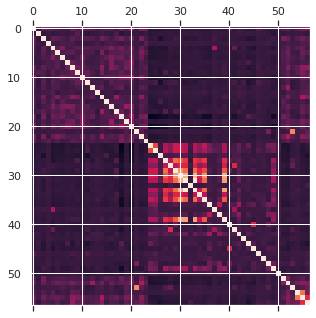

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1d95c1490>,
      dtype=object)

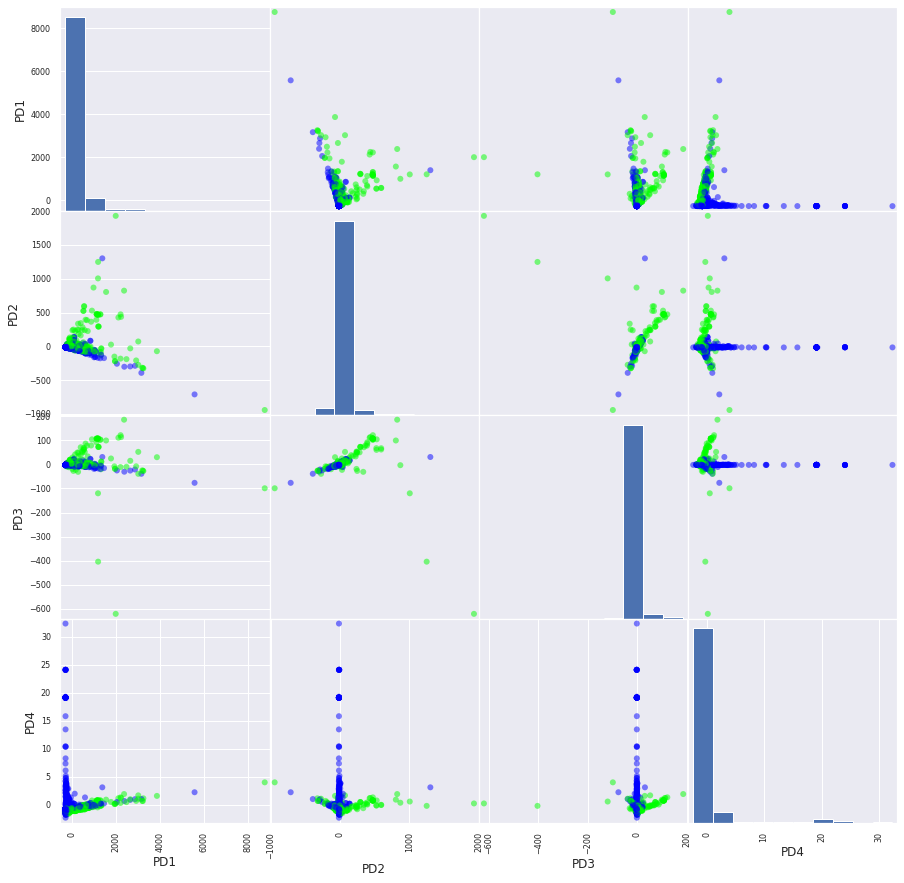

In [ ]:
# PCA with original data

C = X_train.cov()
#print(c)

f = plt.figure(figsize=(5, 5))
corr = X_train.corr()
corr.style.background_gradient(cmap='viridis')
plt.matshow(corr, fignum=f.number)
plt.show()

# eig_val = L, eig_vect = Q
[L,Q_2] = np.linalg.eig(C)

# centering the data and changing the basis
x_mean = X_train - np.mean(X_train, axis = 0)
X_proj = np.dot(Q_2.T,x_mean.T).T

# Picking first four dimensions for plotting.
PCA_data = pd.DataFrame(X_proj[:,0:4], columns=['PD1','PD2','PD3','PD4'])

Y = np.array(y_train).T[0]
pd.plotting.scatter_matrix(PCA_data, c=Y, figsize=(15, 15), marker='o', cmap=plt.cm.brg)

### PCA with scaled data.
We can see in the scatter matrix that the data looks more manageble when it's scaled before applying PCA.

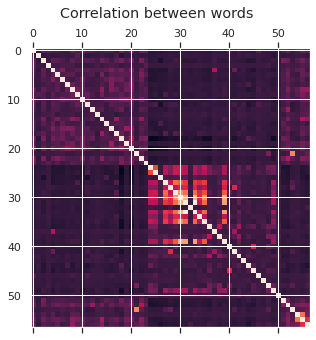

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1d75d5b90>,
      dtype=object)

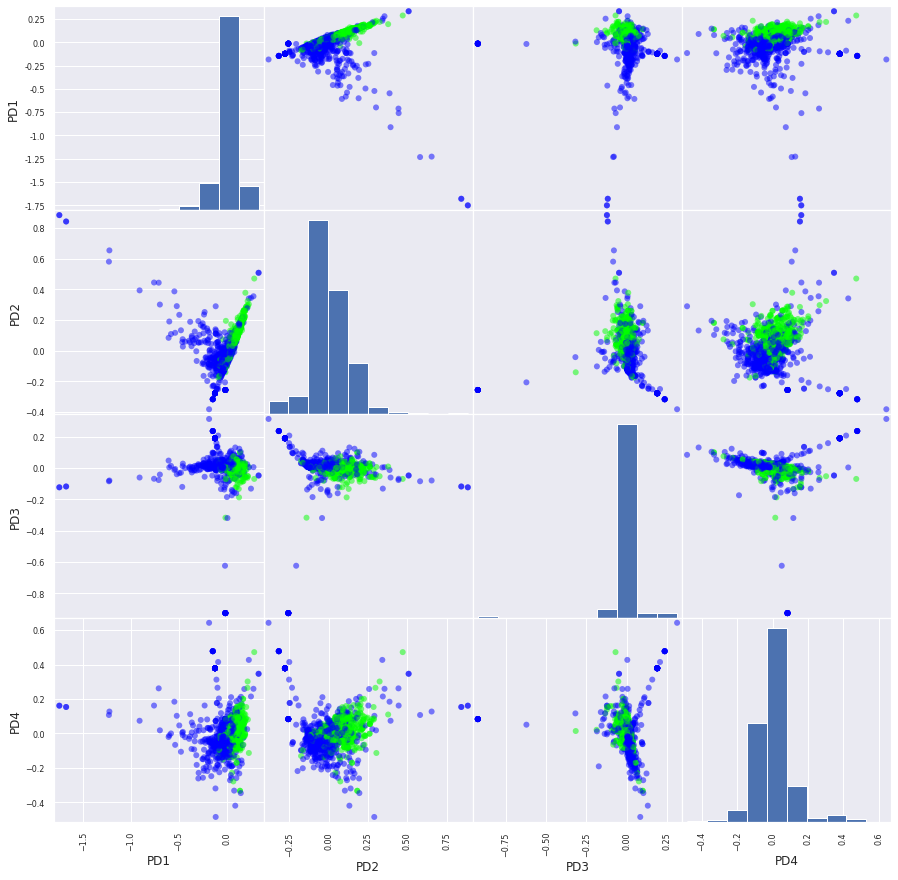

In [ ]:
# PCA with scaled data

C = X_train_scal_A.cov()

# calculating and plotting correlation between words.
f = plt.figure(figsize=(5, 5))
f.suptitle("Correlation between words")
corr = X_train_scal_A.corr()
corr.style.background_gradient(cmap='viridis')
plt.matshow(corr, fignum=f.number)
plt.show()

# eig_val = L, eig_vect = Q
[L,Q] = np.linalg.eig(C)

# center the data and change of basis
x_mean = X_train_scal_A - np.mean(X_train_scal_A, axis = 0)
X_proj = np.dot(Q.T,x_mean.T).T

# Picking first four dimensions for plotting.
PCA_data = pd.DataFrame(X_proj[:,0:4], columns=['PD1','PD2','PD3','PD4'])

Y = np.array(y_train_scal).T[0]
pd.plotting.scatter_matrix(PCA_data, c=Y, figsize=(15, 15), marker='o', cmap=plt.cm.brg)

### kNN on scaled and reduced data

In [ ]:
# kNN on scaled data


test_data_mean = X_test_scal_A - np.mean(X_test_scal_A, axis = 0)
X_proj_test = np.dot(Q.T,test_data_mean.T).T

accuracy_matrix = np.zeros([18,9])

# apply kNN on the data
# How many PD's
for i in range(3,21):
  # How many neighbours
  for n in range(1,10):
    PCA_data = pd.DataFrame(X_proj[:,:i])

    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(PCA_data, y_train_scal.values.ravel())

    kNN_pred = neigh.predict(X_proj_test[:,:i])

    #placing accuracy score into matrix
    accuracy_matrix[i-3,n-1] = accuracy_score(y_test_scal, kNN_pred)

Plotting accuracy with regards to the amount of neigbors used in the nearest neihbor modell and amount of principle directions taken from the PCA changed data.

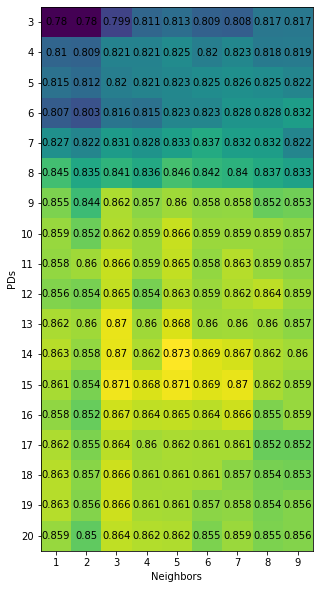

In [ ]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

# fix axes
plt.yticks(ticks = range(18), labels=range(3,21))
plt.ylabel('PDs')
plt.xticks(ticks = range(9), labels=range(1,10))
plt.xlabel('Neighbors')

#values = np.unique(accuracy_matrix.ravel())
#im = plt.imshow(accuracy_matrix, interpolation='none')
#colors = [ im.cmap(im.norm(value)) for value in values]
## create a patch (proxy artist) for every color 
#patches = [ mpatches.Patch(color=colors[i], label="Score: {l}".format(l=np.round(values[i],decimals=4)) ) for i in range(len(values)) ]
## put those patched as legend-handles into the legend
#ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

# printing accuracy scores in boxes
for i in range(18):
  for j in range(9):
    text = ax.text(j, i, np.round(accuracy_matrix[i, j],decimals=3), ha="center", va="center", color="black")


ax.imshow(accuracy_matrix, cmap='viridis')


max score is 0,873 at 5 PDs and 14 neighbors

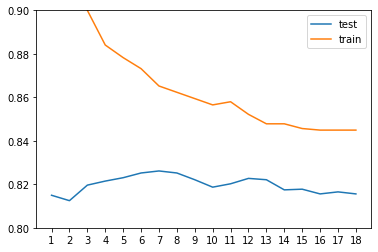

In [ ]:
PDS = 5
r = 18
PCA_data = pd.DataFrame(X_proj[:,:PDS])

accuracy_list_test = np.zeros(r)
accuracy_list_train = np.zeros(r)
for n in range(1, r+1):
  # How many neighbours
  neigh = KNeighborsClassifier(n_neighbors=n)
  neigh.fit(PCA_data, y_train_scal.values.ravel())

  kNN_pred_test = neigh.predict(X_proj_test[:,:PDS])
  kNN_pred_train = neigh.predict(X_proj[:,:PDS])

  #placing accuracy score into matrix
  accuracy_list_test[n-1] = accuracy_score(y_test_scal, kNN_pred_test)
  accuracy_list_train[n-1] = accuracy_score(y_train_scal, kNN_pred_train)

# plot the result
plt.xticks(ticks = range(r), labels=range(1,r+1))
plt.ylim([0.8,0.9])
plt.plot(accuracy_list_test , label="test")
plt.plot(accuracy_list_train , label="train")

plt.legend()

### SVM

#### SVM On all data

0.9164855634895995
Accuracy: 0.92 (+/- 0.08)


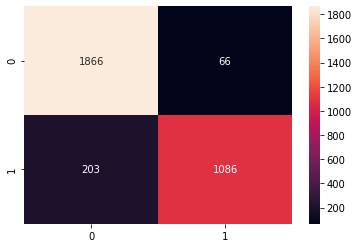

In [ ]:

svm_classifier = svm.SVC(kernel = 'rbf')
svm_classifier.fit(X_train_scal_A, np.array(y_train_scal_A).T[0])

print(svm_classifier.score(X_test_scal_A, np.array(y_test_scal).T[0]))

svm_pred = svm_classifier.predict(X_test_scal_A)
#plot_confusion_matrix(svm_classifier, X_test_scal_A, np.array(y_test_scal_A).T[0])

cm = confusion_matrix(np.array(y_test_scal_A).T[0], svm_pred)
sn.heatmap(cm,annot=True, fmt='g')

scores = cross_val_score(svm_classifier, all_data, np.array(pd_labels).T[0], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#### SVM of PCA data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9133809375970195


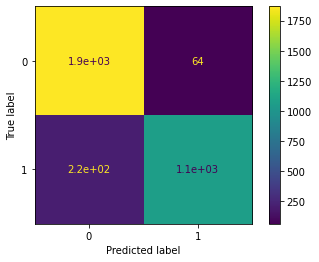

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

x_train_mean = X_train_scal - np.mean(X_train_scal, axis = 0)
X_train_proj = np.dot(q.T,x_train_mean.T).T

x_test_mean = X_test_scal - np.mean(X_test_scal, axis = 0)
X_test_proj = np.dot(q.T,x_test_mean.T).T

PCA_test_data = pd.DataFrame(X_test_proj[:,0:40])
PCA_train_data = pd.DataFrame(X_train_proj[:,0:40])

svm_classifier = svm.SVC(kernel = 'rbf')
svm_classifier.fit(PCA_train_data, y_train_scal)
print(svm_classifier.score(PCA_test_data, y_test_scal))
svm_pred = svm_classifier.predict(PCA_train_data)
plot_confusion_matrix(svm_classifier, PCA_test_data, y_test_scal)

# scores = cross_val_score(svm_classifier, word_data, pd_labels, cv=5)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#### Looking at over/underfitting

31


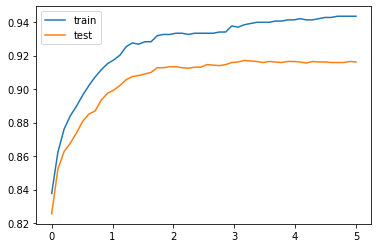

In [ ]:
def svm_comparison(gamma):
  clf = svm.SVC(gamma=gamma)
  clf.fit(X_train_scal, np.array(y_train_scal).T[0])
  train_acc = clf.score(X_train_scal, y_train_scal)
  test_acc = clf.score(X_test_scal, y_test_scal)
  return test_acc, train_acc

g = 50

# create two empy arrays to store the result
train = np.zeros(g)
test = np.zeros(g)

# run svm for 
for i in range(1, g+1):
  test[i-1], train[i-1] = svm_comparison(i/10)

x = np.linspace(0, g/10, g)

# plot the result
print(np.argmax(test))
plt.plot(x, train, label="train")
plt.plot(x, test, label="test")
plt.legend()


### Gausian process

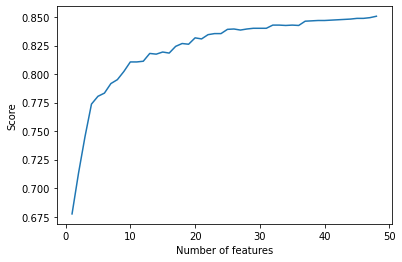

In [ ]:
def do_GP(k_dimensions):
  selector = fs.SelectKBest(k=k_dimensions).fit(X_train_scal, np.array(y_train_scal).T[0])
  X_train_select = selector.transform(X_train_scal)
  X_test_select = selector.transform(X_test_scal)

  gp_classifier =  GaussianProcessClassifier().fit(X_train_select, np.array(y_train_scal).T[0])
  return gp_classifier.score(X_test_select, y_test_scal)

result = np.zeros(48)

for i in range(1, 49):
  result[i - 1] = do_GP(i)

plt.xlabel("Number of features")
plt.ylabel("Score")
plt.plot(range(1, 49), result)
plt.show()

print()

0.779261099037566
0.7721204594846321


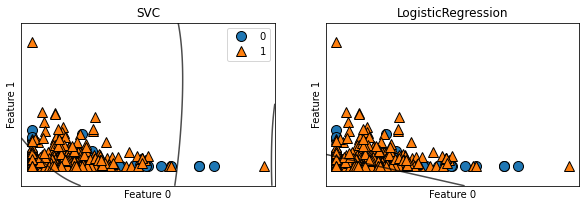

In [ ]:
selector = fs.SelectKBest(k=2).fit(X_train, np.array(y_train).T[0])
X_train_select = selector.transform(X_train)

X_test_select = selector.transform(X_test)

#plt.scatter(X_train_select)
#!pip install mglearn


#X, y = mglearn.datasets.make_forge()
X = X_train_select
y = np.array(y_train).T[0]


fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([svm.SVC(gamma=0.1), LogisticRegression()], axes):
    clf = model.fit(X, y)
    print(clf.score(X_test_select, y_test))
    plt.xlim([0,0.5])
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

---
## Discussion

Reflect on your results, and how one might continue to improve them.

## Acknowledgments

For each group member, describe what they did.

## Final meme

![xkcd machine learning](https://imgs.xkcd.com/comics/machine_learning.png "The pile gets soaked with data and starts to get mushy over time, so it's technically recurrent.")

![Alternative Meme](https://external-preview.redd.it/RVy-a0Hwnw1Rzhf94ahRXGMWOBtNJ-5gD98Fzy-WEDU.png?auto=webp&s=8a2431d776f34f7f046330cc96b5db4bf1cf25f2)
